In [114]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

In [115]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(2795, 48)


,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

In [117]:
df.isnull().sum()

Report Number                              0
Supplemental Number                        0
Accident Year                              0
Accident Date/Time                         0
Operator ID                                0
Operator Name                              0
Pipeline/Facility Name                   121
Pipeline Location                          0
Pipeline Type                             18
Liquid Type                                0
Liquid Subtype                          1446
Liquid Name                             2573
Accident City                            315
Accident County                           75
Accident State                            12
Accident Latitude                          0
Accident Longitude                         0
Cause Category                             0
Cause Subcategory                          0
Unintentional Release (Barrels)            0
Intentional Release (Barrels)           1586
Liquid Recovery (Barrels)                  0
Net Loss (

In [118]:
# Check for duplicates
sum(df['Report Number'].value_counts().values) == len(df)

True

In [119]:
# Remove Columns of more than 80% null values

# setting up the thredhold. We want at least 80% of our data to be non-null 
threshold = len(df)*0.80
print(threshold)

print(df.shape)
mine = df.dropna(thresh=threshold, axis=1, inplace=True)
print(df.shape)

2236.0
(2795, 48)
(2795, 31)


In [120]:
# removing useless columns for the analysis
df.drop(columns=['Report Number','Supplemental Number','Public Evacuations', 'Pipeline/Facility Name',
   'Property Damage Costs','Lost Commodity Costs','Public/Private Property Damage Costs',
   'Emergency Response Costs','Environmental Remediation Costs','Other Costs'], inplace=True)

# I am keeping these columns ('Accident Date/Time','Shutdown Date/Time','Restart Date/Time') 
# because I am curious if the cost is related to how long the plan/rig was shutdown 
# but turned out they were removed becuase they are mostly null :( 

df.head()

,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident City,Accident County,Accident State,...,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,All Costs
0,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",MCPHERSON,MCPHERSON,KS,...,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.00,21.0,NO,NO,NO,1627
1,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,ONSHORE,ABOVEGROUND,CRUDE OIL,RAYMOND,CUMBERLAND,ME,...,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.12,0.0,NO,NO,NaN,4008
2,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",SULPHER,CALCASIEU,LA,...,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.00,2.0,NO,NO,NaN,200
3,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",ONSHORE,UNDERGROUND,CRUDE OIL,SUPERIOR,DOUGLAS,WI,...,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.48,0.0,NO,NO,NaN,11540
4,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",ONSHORE,UNDERGROUND,CRUDE OIL,SHERMAN,GRAYSON,TX,...,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,698.00,2.0,NO,NO,NO,29650


In [121]:
df.isnull().sum()

Accident Year                        0
Accident Date/Time                   0
Operator ID                          0
Operator Name                        0
Pipeline Location                    0
Pipeline Type                       18
Liquid Type                          0
Accident City                      315
Accident County                     75
Accident State                      12
Accident Latitude                    0
Accident Longitude                   0
Cause Category                       0
Cause Subcategory                    0
Unintentional Release (Barrels)      0
Liquid Recovery (Barrels)            0
Net Loss (Barrels)                   0
Liquid Ignition                      0
Liquid Explosion                     0
Pipeline Shutdown                  212
All Costs                            0
dtype: int64

# Handle Missing Values

## Handle missing values: Pipeline Shutdown

<AxesSubplot:xlabel='Pipeline Shutdown', ylabel='All Costs'>

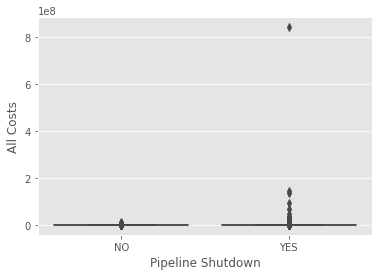

In [122]:
# Looking at 'Pipeline Shutdown' vs. 'All Costs'
sns.boxplot(x='Pipeline Shutdown', y='All Costs', data=df)

In [123]:
df[df['All Costs']>500000000]

,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident City,Accident County,Accident State,...,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,All Costs
194,2010,7/25/2010 5:58 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",ONSHORE,UNDERGROUND,CRUDE OIL,MARSHALL,CALHOUN,MI,...,-84.97251,MATERIAL/WELD/EQUIP FAILURE,ENVIRONMENTAL CRACKING-RELATED,20082.0,18245.0,1837.0,NO,NO,YES,840526118


In [124]:
df.drop([194], inplace=True)

<AxesSubplot:xlabel='Pipeline Shutdown', ylabel='All Costs'>

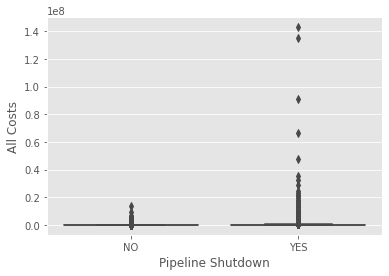

In [125]:
sns.boxplot(x='Pipeline Shutdown', y='All Costs', data=df)

In [126]:
df[~df['Pipeline Shutdown'].isnull()]

,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident City,Accident County,Accident State,...,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,All Costs
0,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",MCPHERSON,MCPHERSON,KS,...,-97.781230,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.00,21.0,NO,NO,NO,1627
4,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",ONSHORE,UNDERGROUND,CRUDE OIL,SHERMAN,GRAYSON,TX,...,-96.648810,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,698.00,2.0,NO,NO,NO,29650
5,2010,1/8/2010 11:38 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",ONSHORE,UNDERGROUND,CRUDE OIL,NECHE,PEMBINA,ND,...,-97.525540,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,3784.00,1547.00,2237.0,NO,NO,YES,4194715
6,2010,1/9/2010 12:15 AM,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",GALENA PARK,HARRIS,TX,...,-95.120100,MATERIAL/WELD/EQUIP FAILURE,ENVIRONMENTAL CRACKING-RELATED,35.00,30.00,5.0,NO,NO,NO,70400
9,2010,1/11/2010 2:30 PM,31684,CONOCOPHILLIPS,ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",PASADENA,HARRIS,TX,...,-95.176110,ALL OTHER CAUSES,MISCELLANEOUS,0.48,0.48,0.0,NO,NO,NO,30050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,2016,12/27/2016 8:40 AM,32334,TC OIL PIPELINE OPERATIONS INC,ONSHORE,ABOVEGROUND,CRUDE OIL,TINA,CARROLL,MO,...,-93.486055,MATERIAL/WELD/EQUIP FAILURE,THREADED CONNECTION/COUPLING FAILURE,0.25,0.25,0.0,NO,NO,YES,61015
2791,2016,12/28/2016 4:20 PM,4906,EXXONMOBIL PIPELINE CO,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",NaN,WEST BATON ROUGE,LA,...,-91.274491,ALL OTHER CAUSES,UNKNOWN,580.00,0.00,580.0,NO,NO,YES,105400
2792,2016,12/29/2016 6:40 AM,39145,ENBRIDGE STORAGE (CUSHING) L.L.C.,ONSHORE,TANK,CRUDE OIL,CUSHING,PAYNE,OK,...,-96.454956,MATERIAL/WELD/EQUIP FAILURE,OTHER EQUIPMENT FAILURE,1.00,1.00,0.0,NO,NO,NO,15050
2793,2017,1/3/2017 10:00 AM,32147,MARATHON PIPE LINE LLC,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",INDUSTRY,BEAVER COUNTY,PA,...,-80.440463,ALL OTHER CAUSES,UNKNOWN,0.20,0.20,0.0,NO,NO,NO,41428


In [127]:
# TODO: deal with NaN's here

## Handling missing values: Accident State

In [128]:
# Relation is that that if Accident State in NaN then the Pipline Type, City and Country is also NaN, 
# Since its 12 values, we can either replace it with NA since long/latis given
df[df['Accident State'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 53 to 2340
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Accident Year                    12 non-null     int64  
 1   Accident Date/Time               12 non-null     object 
 2   Operator ID                      12 non-null     int64  
 3   Operator Name                    12 non-null     object 
 4   Pipeline Location                12 non-null     object 
 5   Pipeline Type                    0 non-null      object 
 6   Liquid Type                      12 non-null     object 
 7   Accident City                    0 non-null      object 
 8   Accident County                  0 non-null      object 
 9   Accident State                   0 non-null      object 
 10  Accident Latitude                12 non-null     float64
 11  Accident Longitude               12 non-null     float64
 12  Cause Category       

In [129]:
# After close inspection, it turned out where Accident State is NaN, the pipeline location is offshore
df[df['Accident State'].isnull()]['Pipeline Location']

53      OFFSHORE
75      OFFSHORE
174     OFFSHORE
233     OFFSHORE
503     OFFSHORE
594     OFFSHORE
999     OFFSHORE
1665    OFFSHORE
1733    OFFSHORE
2039    OFFSHORE
2267    OFFSHORE
2340    OFFSHORE
Name: Pipeline Location, dtype: object

In [130]:
# ALSO if we look at all accidents that are offshore, 
# the lat,long values point to the Gulf of Mexico so the state should either be LA or TX (Louisiana or Texas)

#df.loc[(df['Pipeline Location']=='OFFSHORE') & ~(df['Accident State'].isnull())][['Accident Latitude', 'Accident Longitude', 'Accident State']]
df.loc[(df['Pipeline Location']=='OFFSHORE')][['Accident Latitude', 'Accident Longitude', 'Accident State']]


,Accident Latitude,Accident Longitude,Accident State
53,28.104060,-90.792380,NaN
75,28.685550,-91.045550,NaN
174,28.711239,-89.437681,NaN
233,28.617778,-92.068889,NaN
375,29.375300,-89.356100,LA
503,27.943000,-90.998000,NaN
594,29.265360,-88.772230,NaN
944,29.485000,-89.444167,LA
983,29.422222,-89.990000,LA
999,28.618056,-92.069167,NaN


In [131]:
# SO for all the NaN values in 'Accident State' where the range of (lat,long) is between ([27,29], [-88,-92])
# We can safely replace all NaN with 'LA' which is Louisiana
df['Accident State'].fillna('LA', inplace=True)

In [132]:
# Then we can think of how we want to fill in Accident City and County for OFFSHORE locations.
# only a couple were filled out, and they are within VERY close proximity so we can't use the Lat/Lon vals
# FOR NOW: let's fill them with 'NA' 
df[df['Pipeline Location']=='OFFSHORE'][['Accident City', 'Accident County', 'Accident Latitude', 'Accident Longitude']]

,Accident City,Accident County,Accident Latitude,Accident Longitude
53,NaN,NaN,28.104060,-90.792380
75,NaN,NaN,28.685550,-91.045550
174,NaN,NaN,28.711239,-89.437681
233,NaN,NaN,28.617778,-92.068889
375,NaN,NaN,29.375300,-89.356100
503,NaN,NaN,27.943000,-90.998000
594,NaN,NaN,29.265360,-88.772230
944,BRETON SOUNDS,NaN,29.485000,-89.444167
983,BARATARIA BAY,JEFFERSON,29.422222,-89.990000
999,NaN,NaN,28.618056,-92.069167


In [133]:
df.loc[df[df['Pipeline Location']=='OFFSHORE'].index.tolist(),'Accident City'] = 'NA'
df.loc[df[df['Pipeline Location']=='OFFSHORE'].index.tolist(),'Accident County'] = 'NA'
df[df['Pipeline Location']=='OFFSHORE'][['Accident City', 'Accident County', 'Accident Latitude', 'Accident Longitude']]

,Accident City,Accident County,Accident Latitude,Accident Longitude
53,NA,NA,28.104060,-90.792380
75,NA,NA,28.685550,-91.045550
174,NA,NA,28.711239,-89.437681
233,NA,NA,28.617778,-92.068889
375,NA,NA,29.375300,-89.356100
503,NA,NA,27.943000,-90.998000
594,NA,NA,29.265360,-88.772230
944,NA,NA,29.485000,-89.444167
983,NA,NA,29.422222,-89.990000
999,NA,NA,28.618056,-92.069167


In [134]:
df.isnull().sum()

Accident Year                        0
Accident Date/Time                   0
Operator ID                          0
Operator Name                        0
Pipeline Location                    0
Pipeline Type                       18
Liquid Type                          0
Accident City                      302
Accident County                     60
Accident State                       0
Accident Latitude                    0
Accident Longitude                   0
Cause Category                       0
Cause Subcategory                    0
Unintentional Release (Barrels)      0
Liquid Recovery (Barrels)            0
Net Loss (Barrels)                   0
Liquid Ignition                      0
Liquid Explosion                     0
Pipeline Shutdown                  212
All Costs                            0
dtype: int64

## Handling missing values: Pipeline Type

In [135]:
# looks like when the pipeline location is ONSHORE, it can be either: 
# 'ABOVEGROUND', 'UNDERGROUND', 'TANK', or'TRANSITION AREA'

# BUT if the location is OFFSHORE, then the type is NaN
df[df['Pipeline Type'].isnull()]['Pipeline Location']

53      OFFSHORE
75      OFFSHORE
174     OFFSHORE
233     OFFSHORE
375     OFFSHORE
503     OFFSHORE
594     OFFSHORE
944     OFFSHORE
983     OFFSHORE
999     OFFSHORE
1290    OFFSHORE
1665    OFFSHORE
1733    OFFSHORE
1762    OFFSHORE
2039    OFFSHORE
2267    OFFSHORE
2340    OFFSHORE
2349    OFFSHORE
Name: Pipeline Location, dtype: object

In [136]:
# so we can safely replace NaN with NA 
df['Pipeline Type'].fillna('NA', inplace=True) # we can also call it 'water pipeline' or something

In [137]:
df.isnull().sum()

Accident Year                        0
Accident Date/Time                   0
Operator ID                          0
Operator Name                        0
Pipeline Location                    0
Pipeline Type                        0
Liquid Type                          0
Accident City                      302
Accident County                     60
Accident State                       0
Accident Latitude                    0
Accident Longitude                   0
Cause Category                       0
Cause Subcategory                    0
Unintentional Release (Barrels)      0
Liquid Recovery (Barrels)            0
Net Loss (Barrels)                   0
Liquid Ignition                      0
Liquid Explosion                     0
Pipeline Shutdown                  212
All Costs                            0
dtype: int64

## Handling missing values: Accident City & County 

In [138]:
# let's look at the lat,long, Accident Country and Accident State values for when 
# the Accident City is NaN and the Pipeline Location is ONSHORE
df[(df['Accident City'].isnull()) & (df['Pipeline Location']!='OFFSHORE')][['Accident Latitude', 'Accident Longitude', 'Accident County', 'Accident State']]

,Accident Latitude,Accident Longitude,Accident County,Accident State
8,29.430500,-95.120100,NaN,TX
49,35.483540,-80.735700,NaN,NC
138,38.725820,-99.730180,TREGO,KS
139,29.718767,-95.179554,NaN,TX
158,42.207530,-104.510140,NaN,WY
...,...,...,...,...
2780,31.950230,-102.604223,ECTOR,TX
2781,31.361150,-101.514120,REAGAN,TX
2788,33.655692,-98.624766,ARCHER,TX
2789,32.861800,-102.919210,GAINES,TX


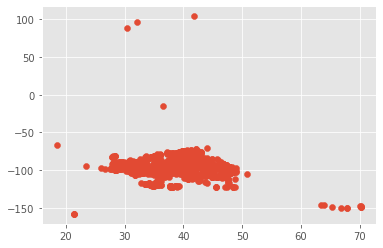

In [139]:
plt.scatter(df['Accident Latitude'], df['Accident Longitude'])
# something that stands out here is the Longitude values above 0, we'll check later

In [140]:
%%script echo SKIPPING, Already done & saved

# since we might use the Accident City and County in the analysis, we can reverse geocode
# the Lat and Long values and extract that info
# it doesn't take much time so might as well do it now

import time
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="mum")

count = 1  # a counter to fire up a 1-min delay every 200 calls so we don't time-out
def _get_physical_address(row):
    """ takes a row, uses geopy library to reverse geocode the row Latitude and Longitude 
        returns the raw format (dict) of the results if exists, otherwise NaN """
    global count

    if count % 200 == 0:
        print(str(count))
        time.sleep(60)

    count += 1
    try:
        location = geolocator.reverse([row['Accident Latitude'], row['Accident Longitude']])
        
        # storing the raw info for now since the library has a rate limit 
        # we can save all the info and extract what we need later then dump the rest
        # works fine since the data is smallish
        return location.raw['address']
    except:
        return np.nan
    
def _prep(row):
    # only query data for ONSHORE accidents that do not have a value in County or City
    if row['Pipeline Location'] != 'OFFSHORE' and \
    (pd.isnull(row['Accident County']) or pd.isnull(row['Accident City'])):
        return _get_physical_address(row)
    else: 
        return "NA"

# applying the function and saving the output to new column Address 
df['Address'] = df.apply(lambda row: _prep(row), axis=1)

SKIPPING, Already done & saved


In [141]:
# load saved and cleaned addresses (adding this step so it doesn't interfere with other changes in the df)
df['Address'] = eval(open('./addresses.txt', 'r').read())
df[['Address']].tail()

,Address
2790,"{'road': 'CR 170', 'hamlet': 'Coloma', 'county..."
2791,"{'hamlet': 'Chenango', 'county': 'West Baton R..."
2792,"{'hamlet': 'Chilesville', 'county': 'Okfuskee ..."
2793,"{'road': 'Midland Beaver Road', 'borough': 'In..."
2794,"{'road': 'County Road 287', 'hamlet': 'Cheapsi..."


In [142]:
# now that we have the physical addresses for all the accident locations using the Lat/Long values 
# we can extract State, County, and City names 
# I would like to double check the extracted values with the ones already in the df (if not NaN) 

def _func(x):
    res = [np.nan, np.nan, np.nan, np.nan]
    if x == {}:
        return res
    if 'city' in x:
        res[0] = x['city'].replace(' City', '')
    elif 'town' in x:
        res[0] = x['town']
    elif 'village' in x:
        res[0] = x['village']
    elif 'hamlet' in x:
        res[0] = x['hamlet']
    elif 'borough' in x:
        res[0] = x['borough']

    if 'county' in x:
        res[1] = x['county'].replace(' County', '').replace(' Parish', '')
    if 'state' in x:
        res[2] = x['state']
        
    if 'country_code' in x:
        res[3] = x['country_code']
    return res
    
df[['City','County','State', 'Country']] = df['Address'].apply(lambda x:_func(x)).values.tolist()

# After all of this, I think it is best we do not use 'Accident City' for analysis. The reason is 
# most (if not all) the pipelines/rigs/plants are located in very remote areas, as far as possible from cities 
# Alot of those pipelines in our data are in 'villages' or what are called 'hamlets'

In [143]:
# Are there any accidents ONSHORE with missing Accident City or Accident County that we 
# didn't find its info using geo reversing?
df.loc[(df['Address']=={}) & (df['Pipeline Location']!='OFFSHORE') & 
       ((df['Accident County'].isnull()) | (df['Accident City'].isnull()))]

,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident City,Accident County,Accident State,...,Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,All Costs,Address,City,County,State,Country


In [144]:
# Accidents where we are missing Accident City or Accident County and we are getting wrong Lat/Long values
df[~(df['Country'].isnull()) & (df['Country']!='us') & 
   ((df['Accident County'].isnull()) | (df['Accident City'].isnull()))] #[['Accident Latitude','Accident Longitude']]

# the Lat/Lon values here point to a very far city in Canada, about 8hour drive from Weston,WY in the US 
# But then

,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident City,Accident County,Accident State,...,Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,All Costs,Address,City,County,State,Country
2287,2015,10/12/2015 9:54 AM,32537,WYOMING PIPELINE COMPANY,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,WESTON,WY,...,1.0,NO,NO,NO,2240,"{'county': 'Census Division No. 6', 'state': '...",NaN,Census Division No. 6,Saskatchewan,ca


In [145]:
# if we look at all the accidents in Weston,WY in this data, we find that all of them are in close proximity from 
# each other (lat and lon values between 43 and 104-105) EXCEPT for that one outlier we see above with lat value of 50
# making it land in Canada 
# I think we can safely fill the NA's below to OSAGE 
df.loc[df[df['Accident County']=='WESTON'][['Accident City']].index, 'Accident City'] = 'OSAGE'

In [146]:
df[df['Accident County']=='WESTON']

,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident City,Accident County,Accident State,...,Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,All Costs,Address,City,County,State,Country
1263,2013,6/1/2013 12:30 PM,1248,BELLE FOURCHE PIPELINE CO,ONSHORE,ABOVEGROUND,CRUDE OIL,OSAGE,WESTON,WY,...,5.0,NO,NO,YES,5500,"{'road': 'Skull Creek Road', 'hamlet': 'Osage'...",Osage,Weston,Wyoming,us
1964,2015,2/2/2015 12:05 PM,32537,WYOMING PIPELINE COMPANY,ONSHORE,ABOVEGROUND,CRUDE OIL,OSAGE,WESTON,WY,...,0.0,NO,NO,YES,625,"{'house_number': '923', 'road': 'WY 450', 'cou...",NaN,Weston,Wyoming,us
1984,2015,2/23/2015 9:20 AM,32537,WYOMING PIPELINE COMPANY,ONSHORE,ABOVEGROUND,CRUDE OIL,OSAGE,WESTON,WY,...,0.5,NO,NO,NO,825,"{'house_number': '923', 'road': 'WY 450', 'cou...",NaN,Weston,Wyoming,us
2142,2015,6/19/2015 8:00 AM,32537,WYOMING PIPELINE COMPANY,ONSHORE,UNDERGROUND,CRUDE OIL,OSAGE,WESTON,WY,...,2.0,NO,NO,NO,11300,"{'county': 'Niobrara County', 'state': 'Wyomin...",NaN,Niobrara,Wyoming,us
2146,2015,6/23/2015 4:00 AM,32537,WYOMING PIPELINE COMPANY,ONSHORE,ABOVEGROUND,CRUDE OIL,OSAGE,WESTON,WY,...,1.0,NO,NO,NO,330,"{'road': 'Little Thunder Road', 'county': 'Wes...",NaN,Weston,Wyoming,us
2167,2015,7/13/2015 5:00 AM,32537,WYOMING PIPELINE COMPANY,ONSHORE,TANK,CRUDE OIL,OSAGE,WESTON,WY,...,2.0,NO,NO,NO,1684,"{'road': 'Little Thunder Road', 'county': 'Wes...",NaN,Weston,Wyoming,us
2202,2015,8/6/2015 11:00 AM,32537,WYOMING PIPELINE COMPANY,ONSHORE,UNDERGROUND,CRUDE OIL,OSAGE,WESTON,WY,...,2.0,NO,NO,NO,321155,"{'road': 'Oil City Road', 'county': 'Weston Co...",NaN,Weston,Wyoming,us
2223,2015,8/25/2015 5:00 AM,32537,WYOMING PIPELINE COMPANY,ONSHORE,TANK,CRUDE OIL,OSAGE,WESTON,WY,...,0.5,NO,NO,NO,820,"{'road': 'WY 450', 'county': 'Weston County', ...",NaN,Weston,Wyoming,us
2270,2015,9/28/2015 10:30 AM,32537,WYOMING PIPELINE COMPANY,ONSHORE,ABOVEGROUND,CRUDE OIL,OSAGE,WESTON,WY,...,0.5,NO,NO,YES,70020,"{'road': 'Eberspecher', 'county': 'Weston Coun...",NaN,Weston,Wyoming,us
2280,2015,10/7/2015 4:00 PM,32537,WYOMING PIPELINE COMPANY,ONSHORE,UNDERGROUND,CRUDE OIL,OSAGE,WESTON,WY,...,0.5,NO,NO,YES,410,"{'road': 'WY 450', 'county': 'Weston County', ...",NaN,Weston,Wyoming,us


In [147]:
# Are there any accidents ONSHORE with missing Accident City or Accident County that we STILL
# didn't find its info using geo reversing? and why
df_sub = df[(df['Pipeline Location']!='OFFSHORE') & 
   ((df['Accident County'].isnull()) | (df['Accident City'].isnull())) &
  ((df['County'].isnull()) | (df['City'].isnull()))].copy()

In [148]:
# plus, as I was working on the lat/long vals, I noticed a couple of 'wierd' data
weird_vals = [1163, 2595, 1555, 1502, 1755, 2193]
df.loc[weird_vals]

# it seems that whoever entered the data forgot the 'negative' size in front of some of the Longitude values
# making it appear in China. 
# The last one points the middle of the ocean north of Africa XD 

# HOWEVER, we only care about those IFF they are missing Accident City and/or Accident County values

,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident City,Accident County,Accident State,...,Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,All Costs,Address,City,County,State,Country
1163,2013,3/12/2013 5:46 PM,31556,CHEVRON MIDSTREAM PIPELINES LLC,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",N/A - ACCIDENT OCCURED IN REMOTE MARSH AREA.,LAFOURCHE,LA,...,23702.0,YES,NO,YES,10262149,{},NaN,NaN,NaN,NaN
2595,2016,7/12/2016 12:00 PM,32453,BHP BILLITON PETROLEUM (EAGLE FORD GATHERING) LLC,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,Not Within a County or Parish,TX,...,5.6,NO,NO,YES,76224,"{'county': 'La Salle County', 'state': 'Texas'...",NaN,La Salle,Texas,us
1555,2014,3/2/2014 1:00 PM,31270,TRI-STATES NGL PIPELINE LLC,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",MOBILE,MOBILE,AL,...,3.0,NO,NO,NaN,1090,"{'county': 'ཤན་རྩ་རྫོང་ / 申扎县 / Xainza', 'regi...",NaN,ཤན་རྩ་རྫོང་ / 申扎县 / Xainza,西藏自治区 - བོད་,cn
1502,2014,1/26/2014 11:00 AM,22610,"MAGELLAN PIPELINE COMPANY, LP",ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",FROST,NAVARRO,TX,...,0.0,NO,NO,NO,7235,"{'village': '吉仁达', 'county': 'ནང་ཆེན་རྫོང་། 囊谦...",吉仁达,ནང་ཆེན་རྫོང་། 囊谦县,青海省,cn
1755,2014,8/7/2014 7:49 PM,31720,"EXPRESS HOLDINGS (USA), LLC",ONSHORE,UNDERGROUND,CRUDE OIL,YODER,GOSHEN,WY,...,0.0,YES,NO,YES,672200,"{'county': 'Хүрмэн', 'state': 'Өмнөговь', 'cou...",NaN,Хүрмэн,Өмнөговь,mn
2193,2015,7/31/2015 12:50 AM,1845,"BUCKEYE PARTNERS, LP",ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",LINDEN,UNION,NJ,...,0.0,NO,NO,NO,65000,{},NaN,NaN,NaN,NaN


In [152]:
# %%script echo NOT YET, only after we fix weird lat/long values and wrong countries
# now that we fixed the wierd values let's fill the Accident City and County with the queried data
df['Accident City'].fillna(df['City'], inplace=True)
df['Accident County'].fillna(df['County'], inplace=True

In [161]:
# For now I saw we give up on the remaining missing cities
# let's check the 2 missing Accident County values and the are:
df[df['Accident County'].isnull()]

,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident City,Accident County,Accident State,...,Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,All Costs,Address,City,County,State,Country
358,2011,1/12/2011 2:00 AM,2552,COLONIAL PIPELINE CO,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",RICHMOND,NaN,VA,...,0.0,NO,NO,NaN,19702,"{'road': 'Interstate Highways 85', 'city': 'Ri...",Richmond,NaN,Virginia,us
743,2012,2/17/2012 12:10 PM,99043,PETROLEUM FUEL AND TERMINAL COMPANY,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",BALTIMORE,NaN,MD,...,0.0,NO,NO,YES,0,"{'road': 'Holabird Avenue', 'neighbourhood': '...",Baltimore,NaN,Maryland,us


In [164]:
# It turned out that both of those cities RICHMOND and BALTIMORE have counties of the same name (i.e. RICHMOND and BALTIMORE). 
df.loc[[358,743],'Accident County'] = ['Richmond', 'Baltimore']

In [165]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2794 entries, 0 to 2794
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Accident Year                    2794 non-null   int64  
 1   Accident Date/Time               2794 non-null   object 
 2   Operator ID                      2794 non-null   int64  
 3   Operator Name                    2794 non-null   object 
 4   Pipeline Location                2794 non-null   object 
 5   Pipeline Type                    2794 non-null   object 
 6   Liquid Type                      2794 non-null   object 
 7   Accident City                    2647 non-null   object 
 8   Accident County                  2794 non-null   object 
 9   Accident State                   2794 non-null   object 
 10  Accident Latitude                2794 non-null   float64
 11  Accident Longitude               2794 non-null   float64
 12  Cause Category      

Accident Year                        0
Accident Date/Time                   0
Operator ID                          0
Operator Name                        0
Pipeline Location                    0
Pipeline Type                        0
Liquid Type                          0
Accident City                      147
Accident County                      0
Accident State                       0
Accident Latitude                    0
Accident Longitude                   0
Cause Category                       0
Cause Subcategory                    0
Unintentional Release (Barrels)      0
Liquid Recovery (Barrels)            0
Net Loss (Barrels)                   0
Liquid Ignition                      0
Liquid Explosion                     0
Pipeline Shutdown                  212
All Costs                            0
Address                              0
City                               893
County                             138
State                              120
Country                  

In [167]:
%%script echo ALREADY SAVED UNLESS UPDATED

df.to_csv('data_clean.csv',index=False)

ALREADY SAVED UNLESS UPDATED


# What is next?


- investigate Pipeline Shutdown see if anything is interesting we can use to fill the NaN's
- ignore Accident City completely?
- manually fix the wrong long/lat values?  
- we need to test the significance of some of those features. Maybe the location doesn't matter whatsoever, or is very insignificant